In [1]:
%pylab inline
from __future__ import print_function
from __future__ import division
from sklearn import linear_model
from sklearn import svm

Populating the interactive namespace from numpy and matplotlib


### Data generation

In [116]:
from data import gen_data

### (a) Protocol

The data generation is in data.py. The function is y = (sin(x−2)*x^3)/(x−2) + ε, where x is drawn uniformly in [0, 8]. This is illustrated in [plot_1.pdf].

We start describing a protocol for estimating the decomposition of the mean squared error in terms of bias, variance and noise for a given regression estimator. The code is in the function plot_bias_var() in plot_mse_decompositon.py. 

First we have to randomly generate N learning sets, then fit each LS and get the predictions of each model on the test set. Then the bias term will be the average amount in which the estimator predictions differ from the predictions of the best possible estimator for the problem or Bayes model. In our case the best possible estimator is the function 'y' without the ε member (the noise). We get the variance by measuring the variability of the predictions of the estimator when fit over different LS of the problem. Finally the residual error is the error that comes from the inherent variability in the data (variance of the y_test values).

An example can be seeing for a support vector regressor with a gaussian kernel in [plot_1.pdf]. In the right side of the plot we have one instance of the LS in blue dots and the function without the noise: y = (sin(x−2)*x^3)/(x−2) as a black line. In red line we show the predictions of one SVR for a single LS set (blue dots) and in pink lines the predictions of other SVR trained over other different randomly drawn instances LS. Finally, in cyan we have the average prediction of the estimator. On the right side of the plot we have the values of the bias, variance and noise for each point in the dataset. The bias in blue line is very low as expected from the left plot where the cyan curve is very close to the black one (actually they almost overlap and it's difficult to visualize). Most to the expected error comes from the variance, that corresponds to the width of the pink lines beam in the left plot. The SVR fits very well the data, and we increased the gamma hyperparameter in order to achieve a wider spread of the fits (pink lines).

Finally we can see for a given datapoint x (in this case 60), the decomposition of the MSE error as an output of plot_bias_var(). The point is shown as a blue dot in the left plot. We notice that the sum of the variance, the bias^2 and noise almost equals the value of the MSE.

MSE decomposition for x = 60

MSE = bias^2 + var + res_error

9.599 ~ 0.097 + 8.542 + 1.006

In [59]:
from plot_mse_decomposition import plot_bias_var

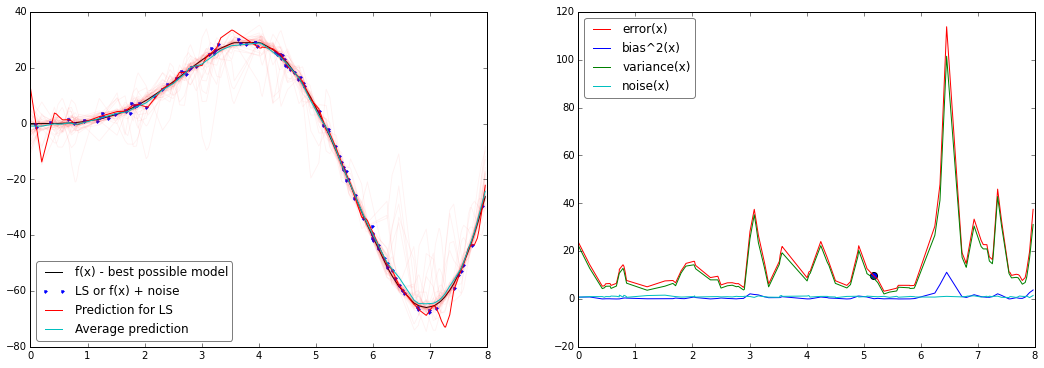

MSE decomposition for x = 60
MSE = bias^2 + var + noise
9.599 ~ 0.097 + 8.542 + 1.006


In [51]:
regr = svm.SVR(kernel='rbf', C=1e3, gamma=30)
_ = plot_bias_var(regr, print_x=60, save='plot_1')

### (b) Linear and nonlinear regression 

Now we will use and compare linear and non-linear regression methods. For the linear method we chose the Lasso and for the non-linear the regression with support vector machines SVR. 

We see a clear difference between the two methods. We use logaritmic scale for this plots. In [plot_2.pdf] we have the same plots as in previous section for the Lasso. The linear model can't properly fit the data, at some points it goes far from the best possible estimator (e.g. around X = 4 and X = 7) and accordingly in the right plot the bias is larger. The variance stays more or less the same, only decreases in the center of the plot, as seen also in the beam of pink lines. We see how the MSE is large due to the large bias (as explained previously).

In [plot_3.pdf] we have the same plot for the SVR. In the right side we see the bias is smaller for this case, which results in a MSE much lower. The logarithmic scale help us to easily visualize that the variance for the SVR is much lower that for the Lasso. That is seen also in the left side where the pink curves (predictions trained with different LS) are almost overlapping. The fit is quite good in average.  

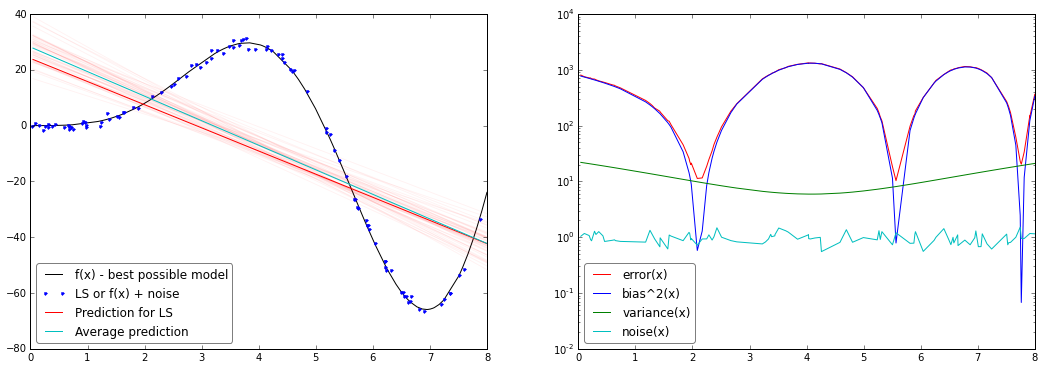

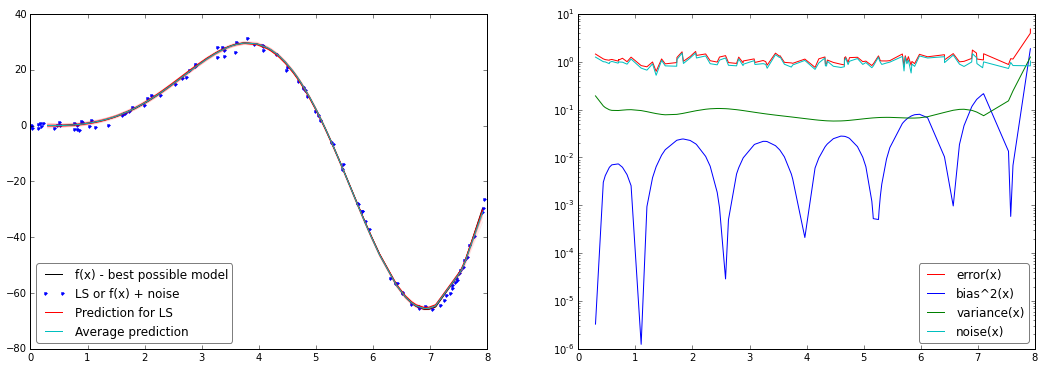

In [52]:
linear = linear_model.Lasso(alpha=1, max_iter=1000)
nonlinear = svm.SVR(kernel='rbf', C=1e3, gamma=0.1) 

_ = plot_bias_var(linear, save='plot_2', logscale=True)
_ = plot_bias_var(nonlinear, save='plot_3', logscale=True)

### (c) Mean values

We can obtain the mean of the bias, variance and residual error over all the datapoints and observe the decomposition of the MSE.

MSE = bias^2 + var + res_error

499.862 ~ 486.820 + 12.222 + 0.981


MSE = bias^2 + var + noise

1.172 ~ 0.060 + 0.148 + 0.947

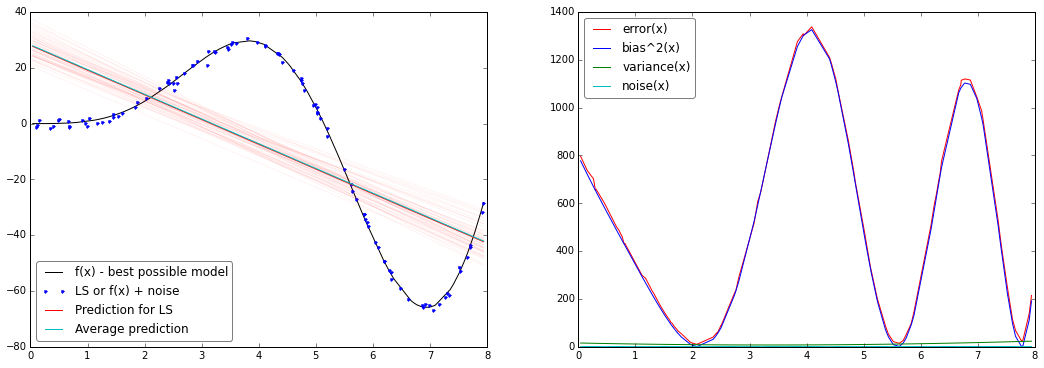

MSE = bias^2 + var + res_error
499.862 ~ 486.820 + 12.222 + 0.981


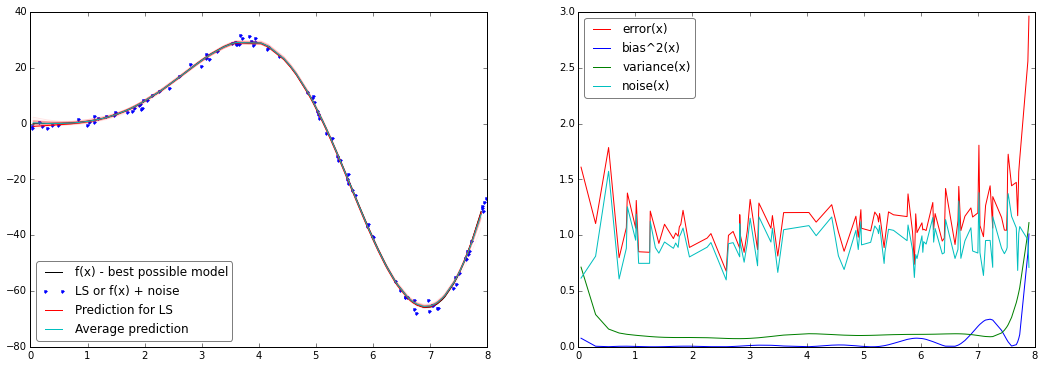

MSE = bias^2 + var + res_error
1.172 ~ 0.060 + 0.148 + 0.947


In [115]:
linear = linear_model.Lasso(alpha=1, max_iter=1000)
nonlinear = svm.SVR(kernel='rbf', C=1e3, gamma=0.1) 

error_mean, bias_mean, variance_mean, noise_mean = plot_bias_var(linear)

print("MSE = bias^2 + var + res_error")
print("{:.3f} ~ {:.3f} + {:.3f} + {:.3f}".format(error_mean, bias_mean, 
                                                 variance_mean, noise_mean))

error_mean, bias_mean, variance_mean, noise_mean = plot_bias_var(nonlinear)

print("MSE = bias^2 + var + res_error")
print("{:.3f} ~ {:.3f} + {:.3f} + {:.3f}".format(error_mean, bias_mean, 
                                                 variance_mean, noise_mean))

### (d) Mean squared error, bias and variance as function of:

We proceed as in the previous sections, and we will get the average of the bias, variance and MSE to analize how they depend on the size of the learning set, on the standard deviation of the noise and the model complexity.

#### Size of the LS

Here we show the MSE, the bias and variance as a function of the size of the learning set. For the Lasso we tried 10 different sizes of LS. [plot_4.pdf] and [plot_5.pdf] show the extreme cases with 5 and 1500 samples. When too few samples in the LS the MSE , bias and variance are high obviously. When many samples the quantities decrease, specially the variance. The trend can be seen in [plot_6.pdf]. The bias stays more or less the same after the size is more than 10. The variance and MSE are decreasing. The decrease of the variance can be seen comparing the pink curves in [plot_4.pdf] and [plot_5.pdf], in the latter the pink curves are more tightly-packed.

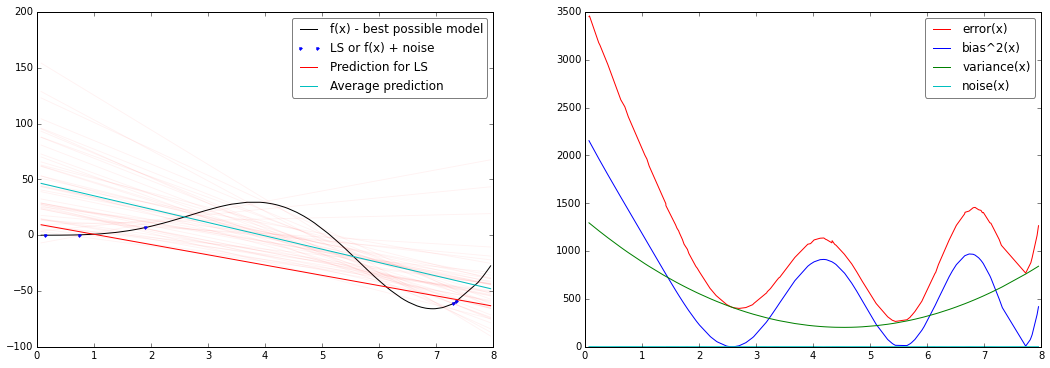

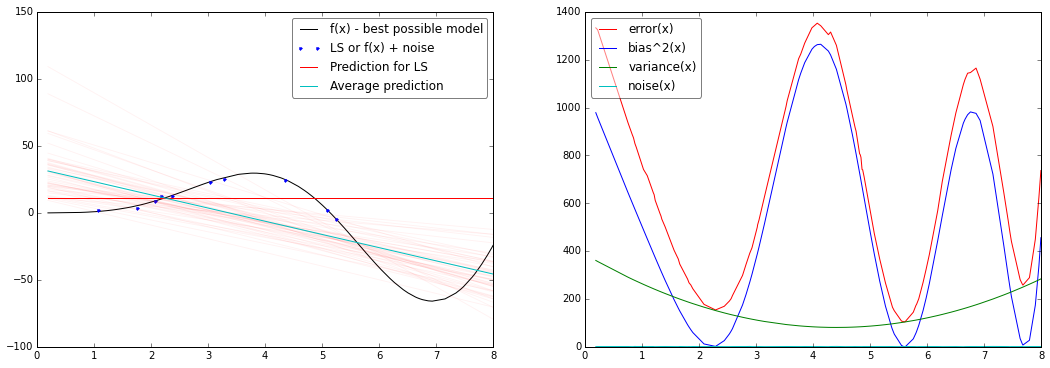

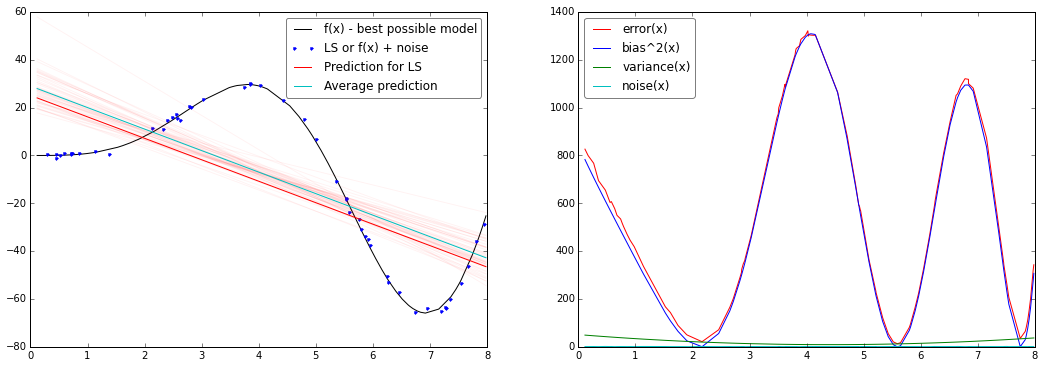

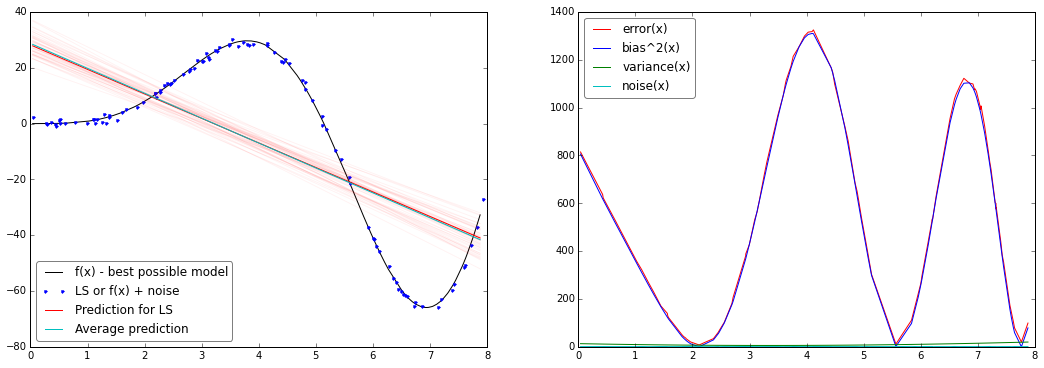

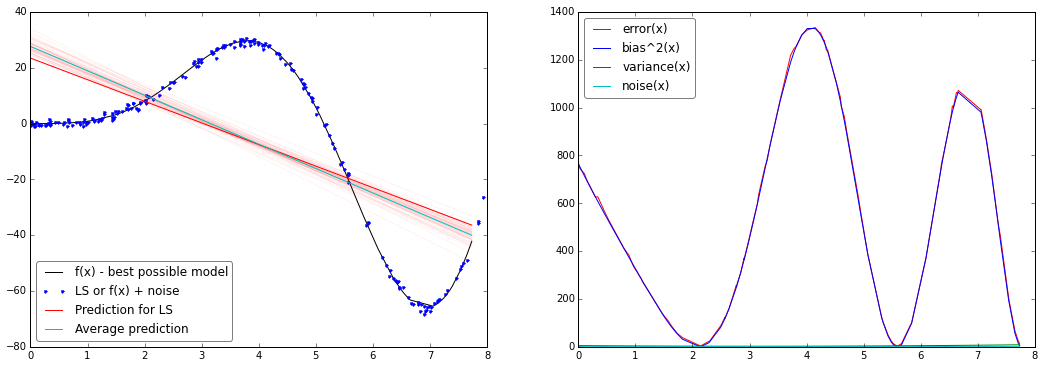

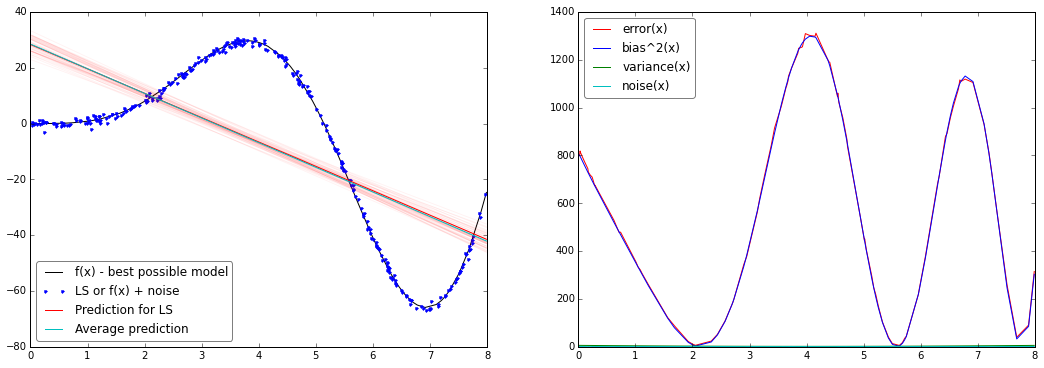

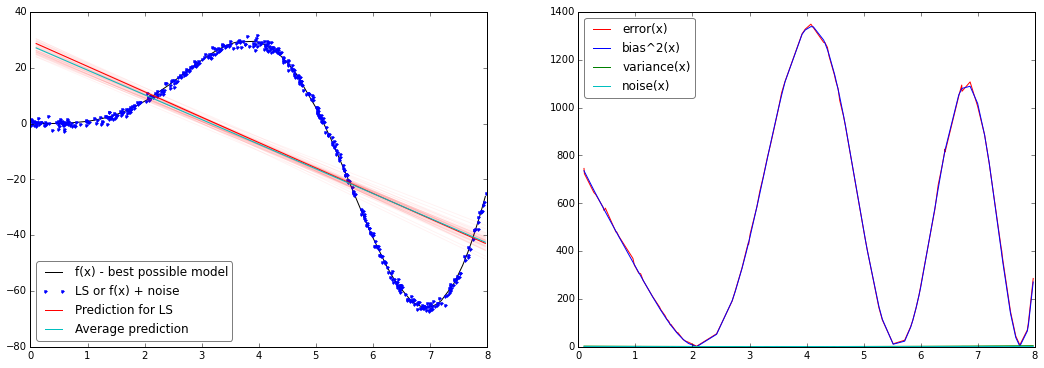

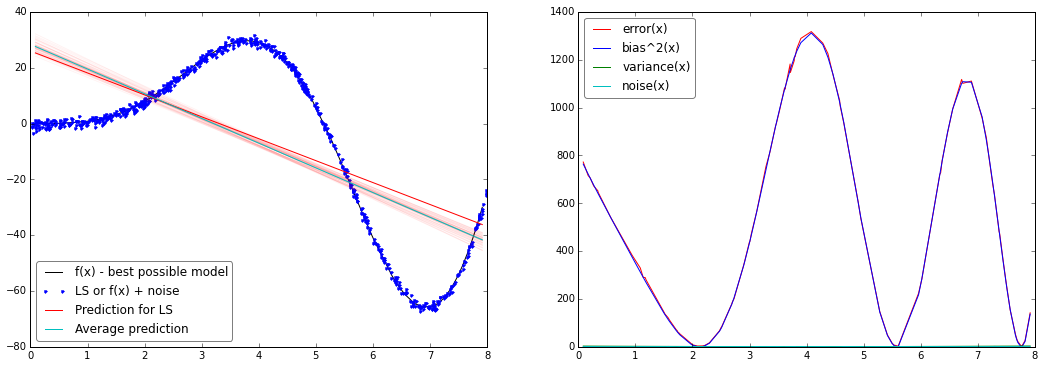

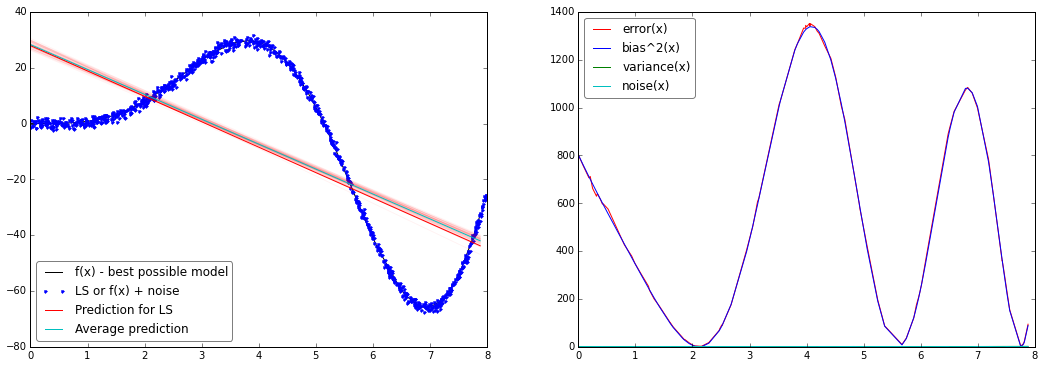

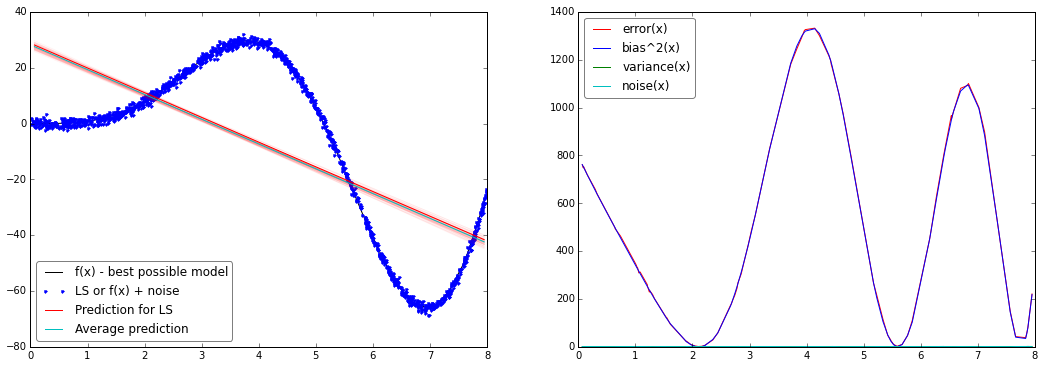

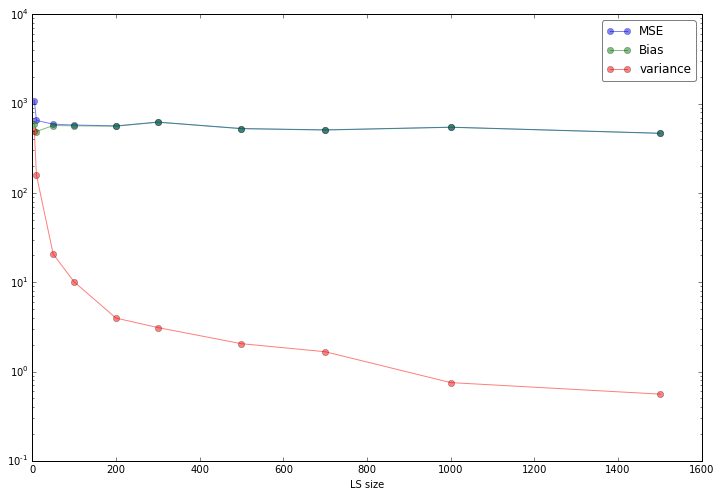

In [72]:
regr = linear_model.Lasso(alpha=1, max_iter=1000)   

sizes = [5,10,50,100,200,300,500,700,1000,1500]
err = np.zeros((len(sizes)))
bi = np.zeros((len(sizes)))
va = np.zeros((len(sizes)))

for i, size in enumerate(sizes):
    if i == 0:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, n_train=size, save='plot_4')
    elif i == len(sizes)-1:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, n_train=size, save='plot_5')
    else:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, n_train=size)
    
plt.figure(figsize=(12,8))
plt.plot(sizes, err, 'o-', label='MSE', alpha=0.5)
plt.plot(sizes, bi, 'o-', label='Bias', alpha=0.5)
plt.plot(sizes, va, 'o-', label='variance', alpha=0.5)
plt.legend(loc='best', fancybox=True, framealpha=0.5)
plt.yscale('log')
plt.xlabel('LS size')
plt.savefig('plot_6.pdf')
plt.show()

For the SVR we tried the same 10 different sizes of LS. [plot_7.pdf] and [plot_8.pdf] show the extreme cases with 5 and 1500 samples. When too few samples in the LS the MSE is larger at the beginnig and the end for this problem. When many samples the quantities decrease very much, they all oscillate around 1. The trend can be seen in [plot_9.pdf]. The three quatities are exponentially decreasing. The fit improves with the LS and in the end the average goes down that much that we can't see the pink curves in [plot_8.pdf]. The more points in the LS the better the error of the estimator.

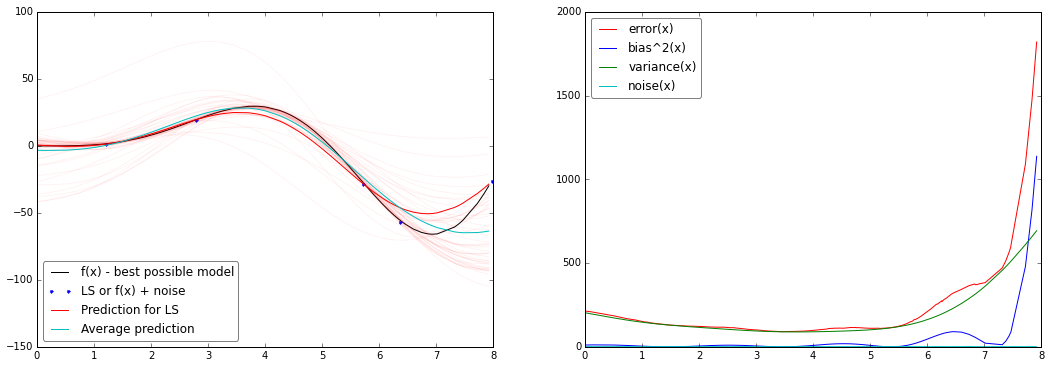

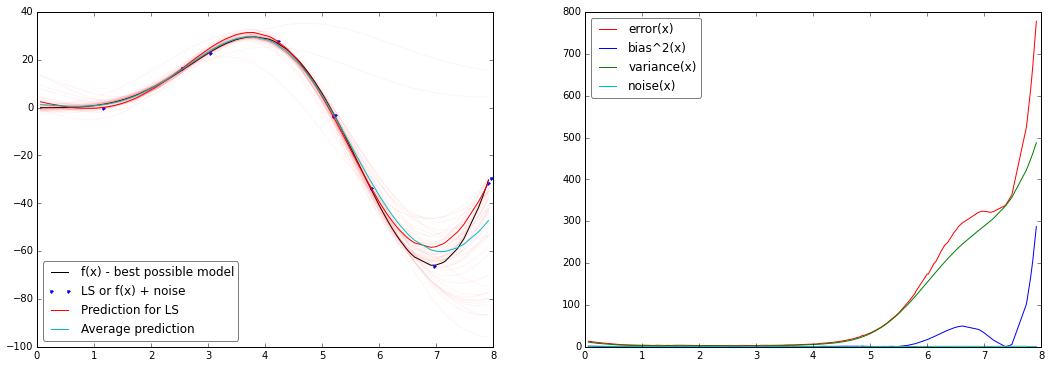

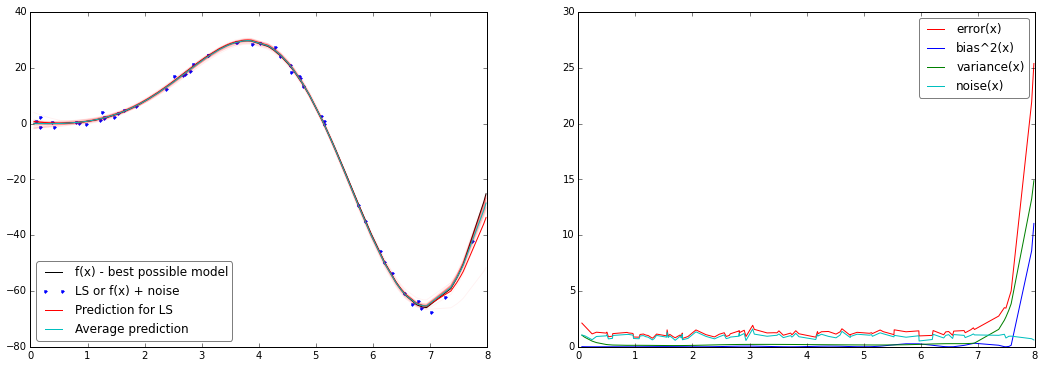

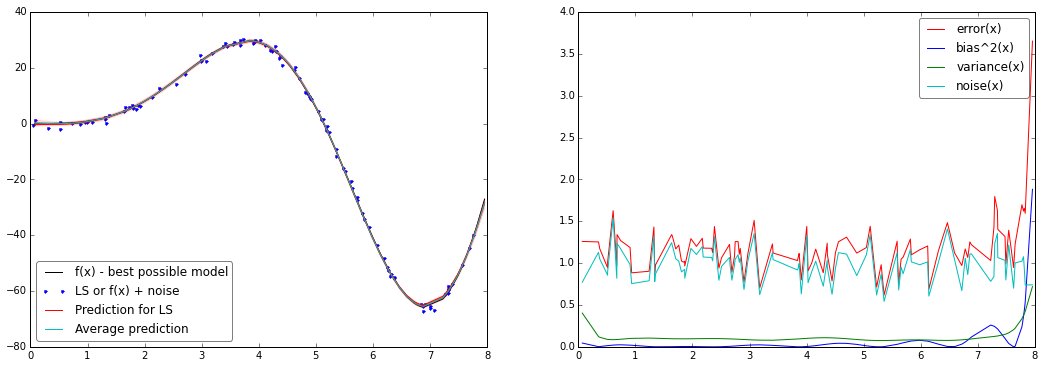

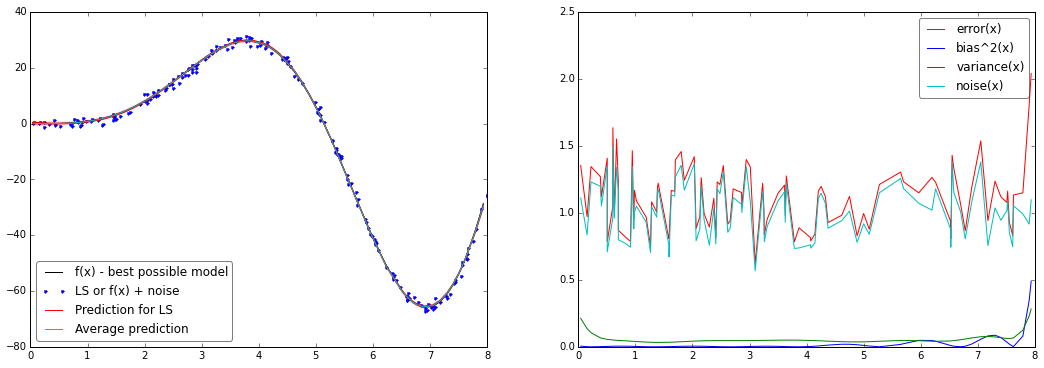

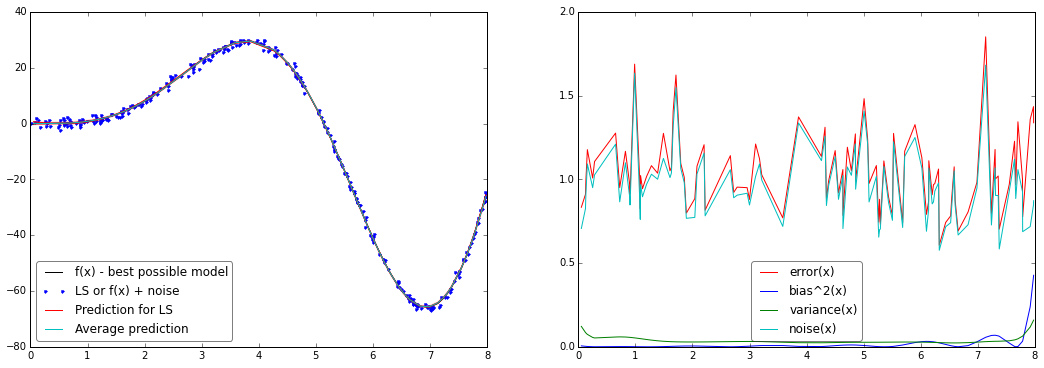

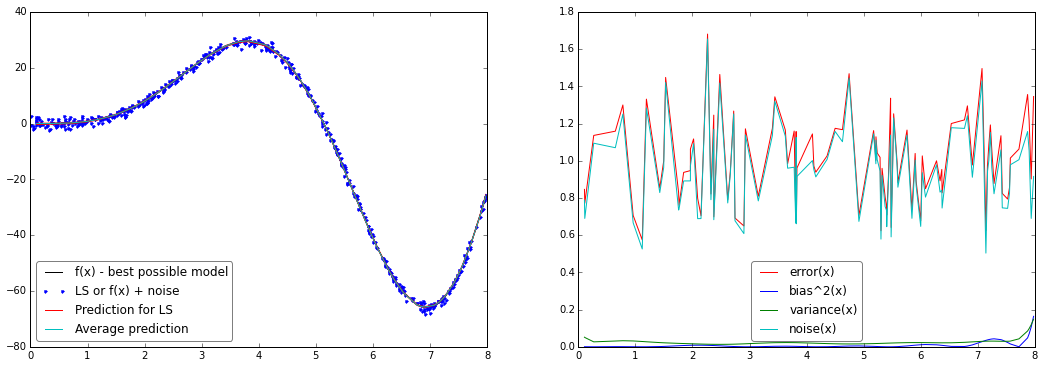

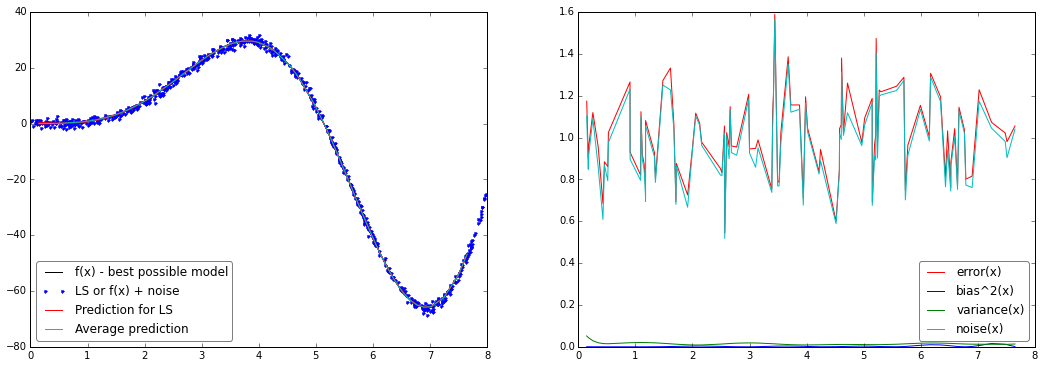

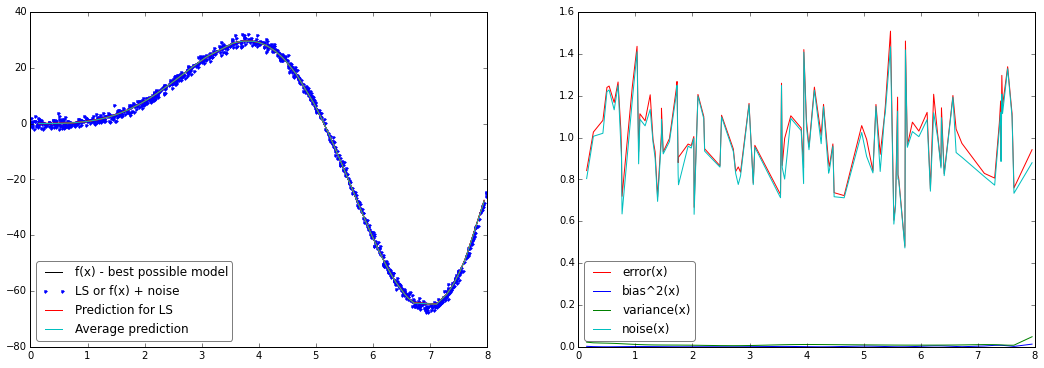

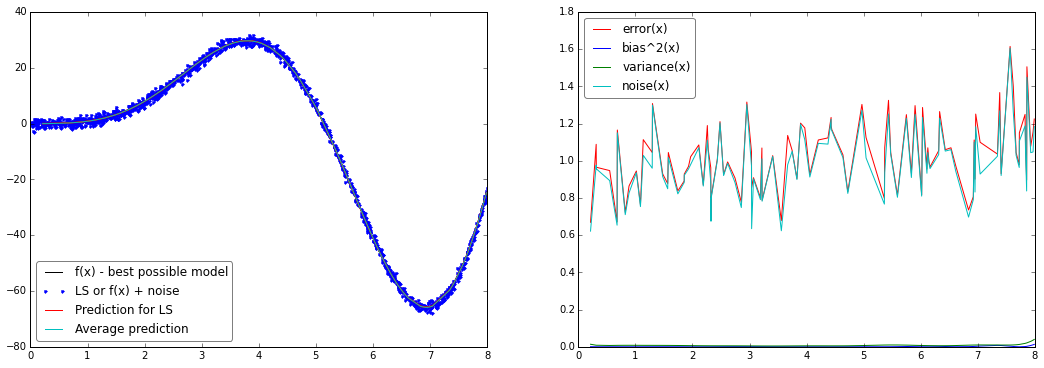

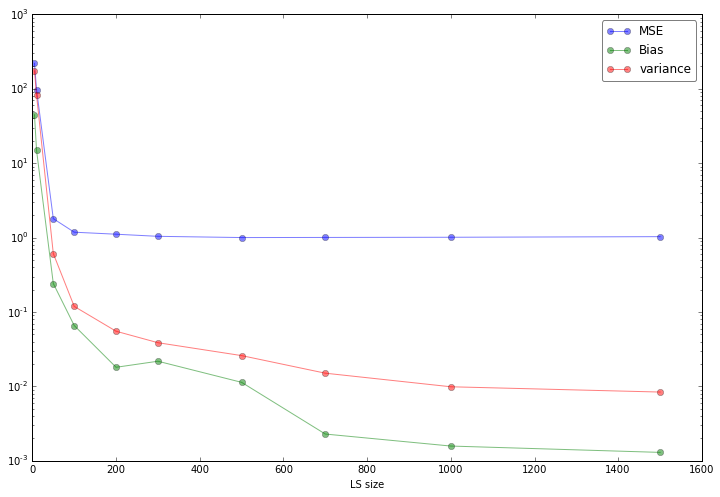

In [80]:
regr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1) 

sizes = [5,10,50,100,200,300,500,700,1000,1500]
err = np.zeros((len(sizes)))
bi = np.zeros((len(sizes)))
va = np.zeros((len(sizes)))

for i, size in enumerate(sizes):
    if i == 0:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, n_train=size, save='plot_7')
    elif i == len(sizes)-1:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, n_train=size, save='plot_8')
    else:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, n_train=size)
    
plt.figure(figsize=(12,8))
plt.plot(sizes, err, 'o-', label='MSE', alpha=0.5)
plt.plot(sizes, bi, 'o-', label='Bias', alpha=0.5)
plt.plot(sizes, va, 'o-', label='variance', alpha=0.5)
plt.legend(loc='best', fancybox=True, framealpha=0.5)
plt.yscale('log')
plt.xlabel('LS size')
plt.savefig('plot_9.pdf')
plt.show()

#### Standard deviation of the noise

Now we explore the MSE, the bias and variance as a function of the noise standard deviation in out data. For the Lasso we tried 10 different values for the standard deviation of epsilon. [plot_10.pdf] and [plot_11.pdf] show the extreme cases with values 0.1 and 50 for this parameter. The trend can be seen in [plot_12.pdf]. All the quantities increase with the standard deviation of the noise. The MSE is worse as both of the variance and bias are higher.

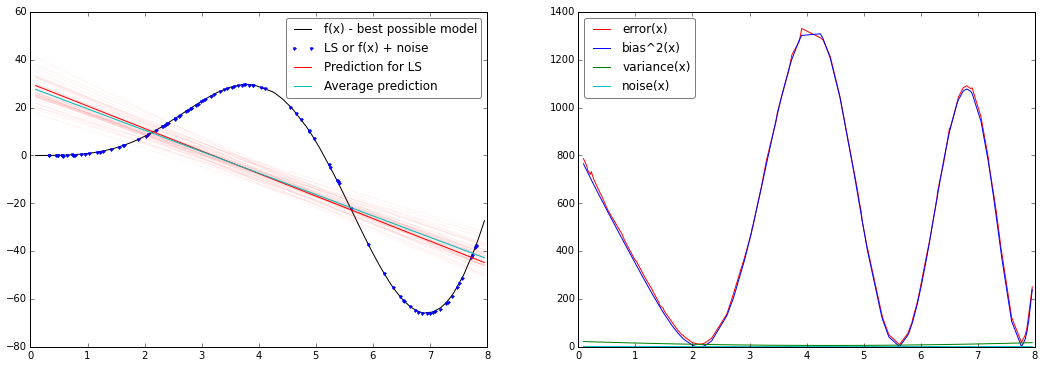

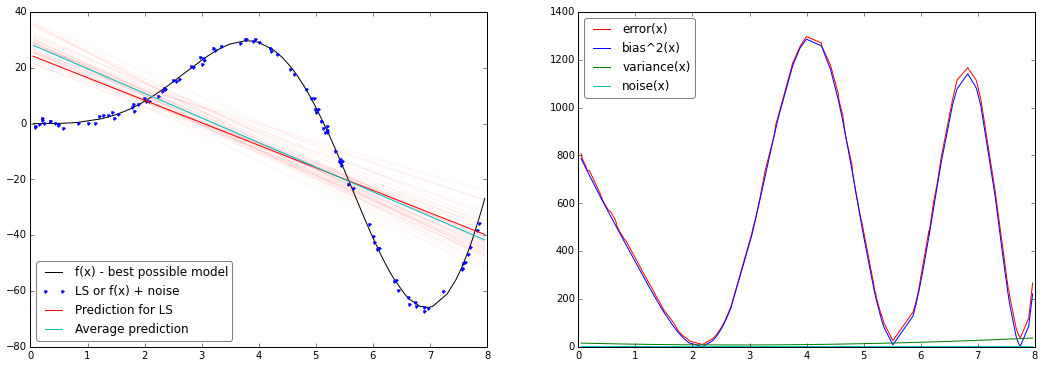

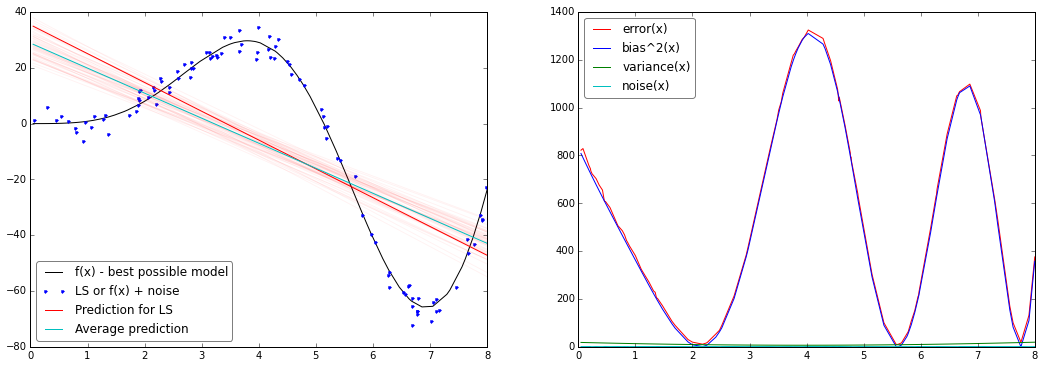

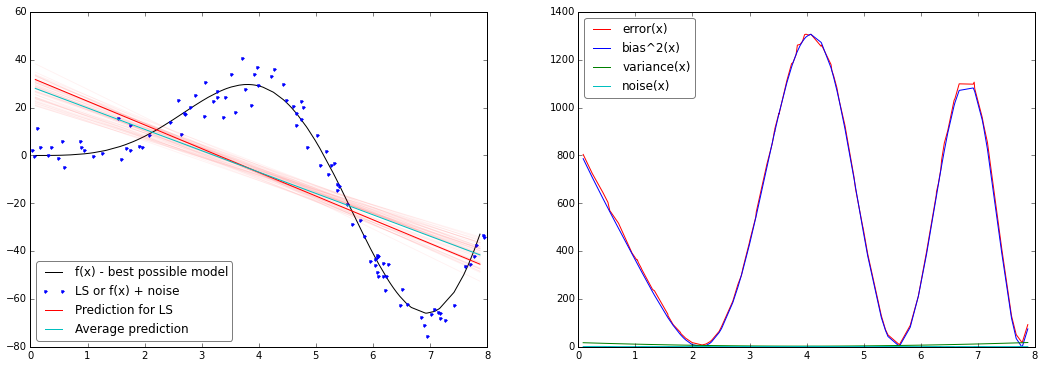

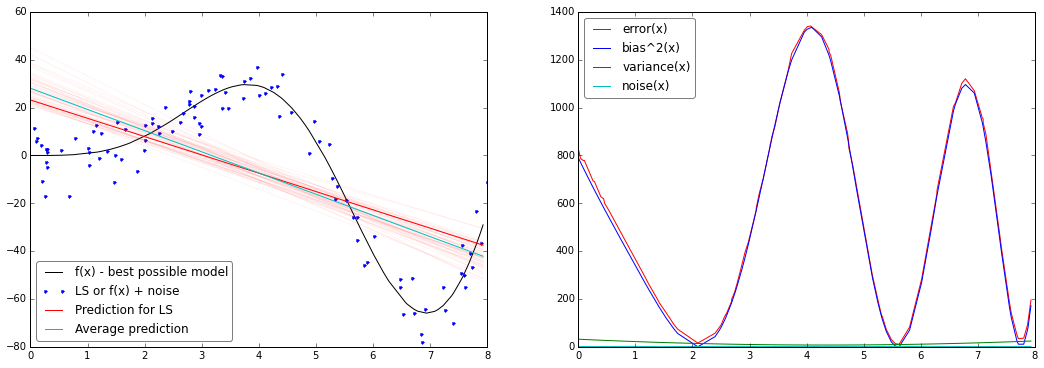

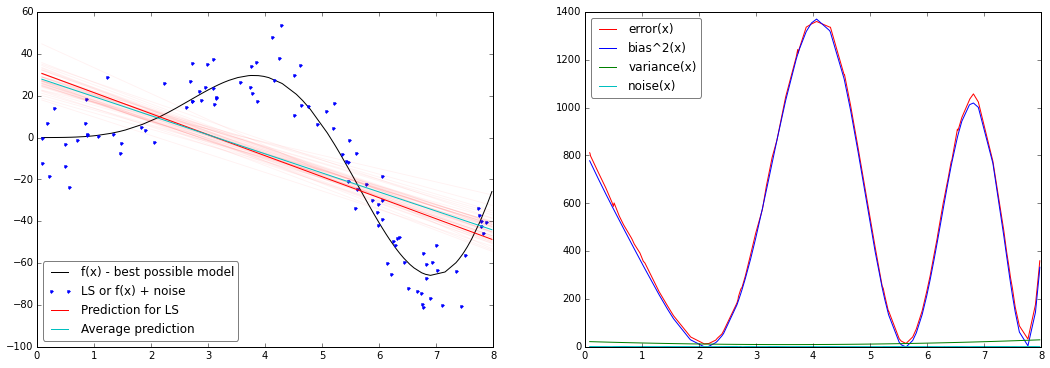

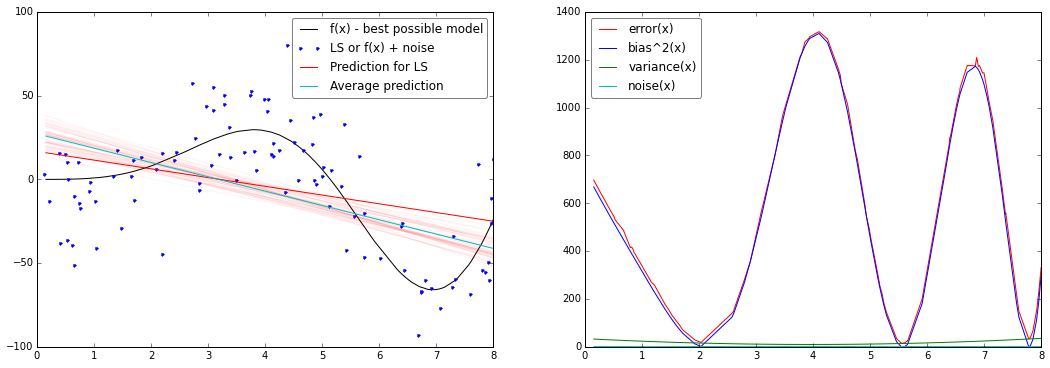

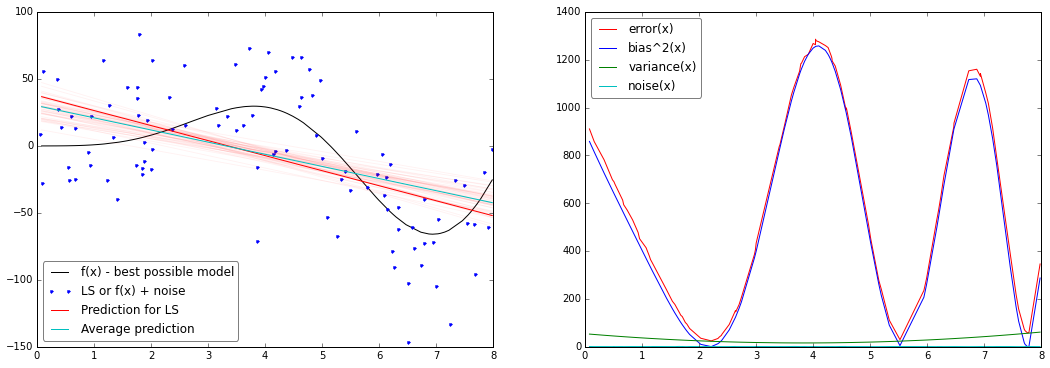

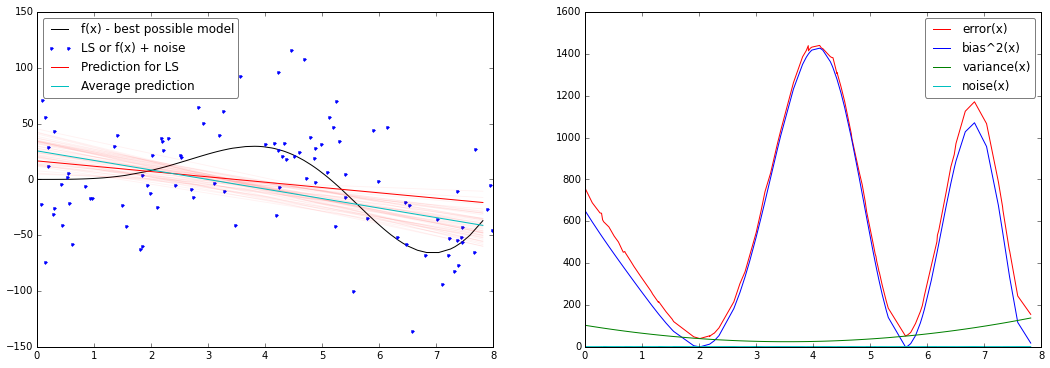

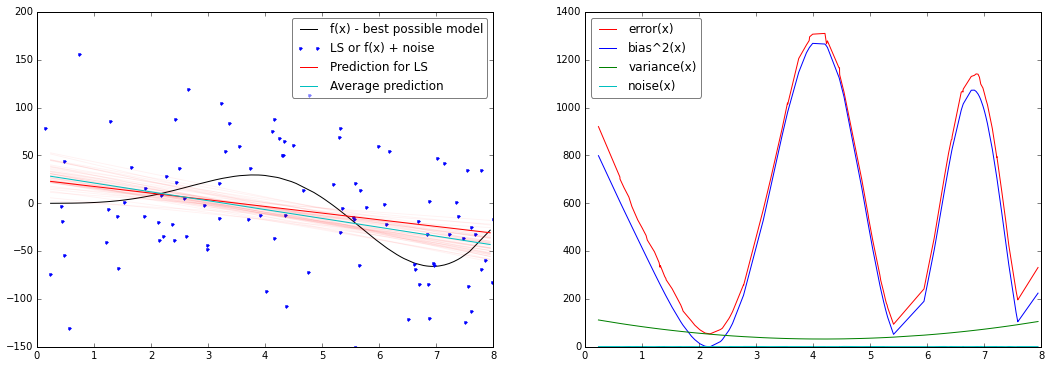

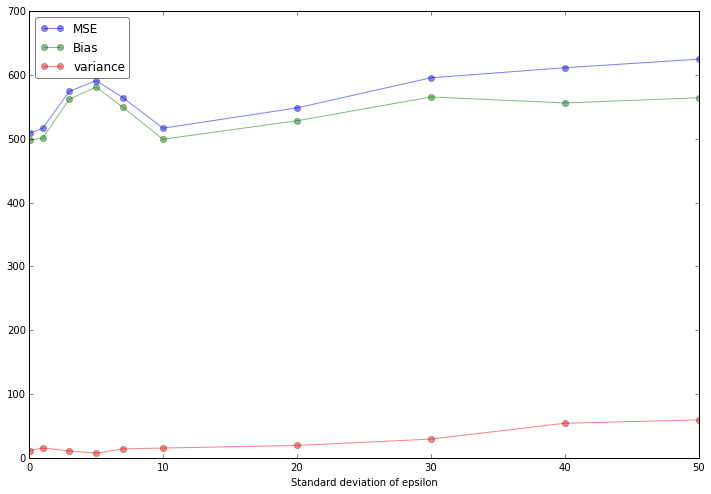

In [86]:
regr = linear_model.Lasso(alpha=1, max_iter=1000)   
    
std_list = [0.1,1,3,5,7,10,20,30,40,50]
err = np.zeros((len(std_list)))
bi = np.zeros((len(std_list)))
va = np.zeros((len(std_list)))

for i, stddev in enumerate(std_list):
    if i == 0:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, stddev=stddev, save='plot_10')
    elif i == len(std_list)-1:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, stddev=stddev, save='plot_11')
    else:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, stddev=stddev)
    
plt.figure(figsize=(12,8))
plt.plot(std_list, err, 'o-', label='MSE', alpha=0.5)
plt.plot(std_list, bi, 'o-', label='Bias', alpha=0.5)
plt.plot(std_list, va, 'o-', label='variance', alpha=0.5)
plt.legend(loc='best', fancybox=True, framealpha=0.5)
# plt.yscale('log')
plt.xlabel('Standard deviation of epsilon')
plt.savefig('plot_12.pdf')
plt.show()

For the SVR we tried also 10 different values for the standard deviation of epsilon. [plot_13.pdf] and [plot_14.pdf] show the extreme cases with values 0.1 and 50 for this parameter. The trend can be seen in [plot_15.pdf]. All the quantities increase with the standard deviation of the noise, but the growth of the bias is much slower. 
Plots [plot_13.pdf] and [plot_14.pdf] gives us a clear view of what is happening. When the noise grows and the points are more spread, the fit is worse and every fit for different LS is very different (pink curves), which results in a higher variance. We see how the cyan (average prediction)  in [plot_14.pdf] is not very far from the black curve showing that the bias does not deteriorate as much.

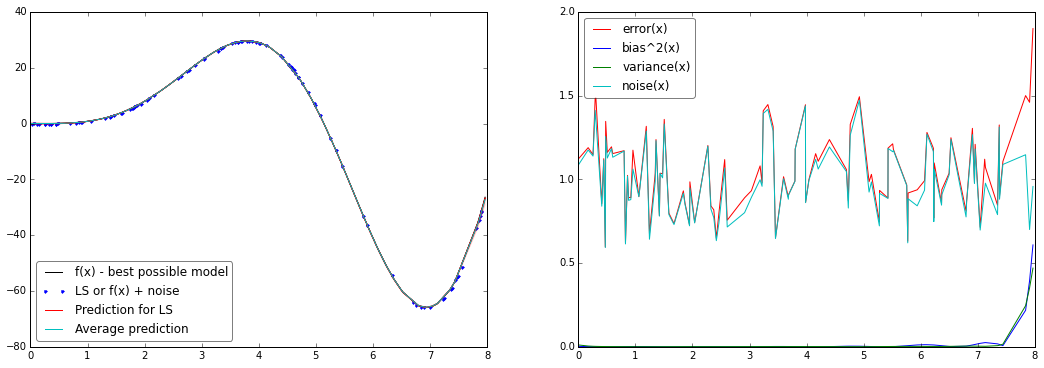

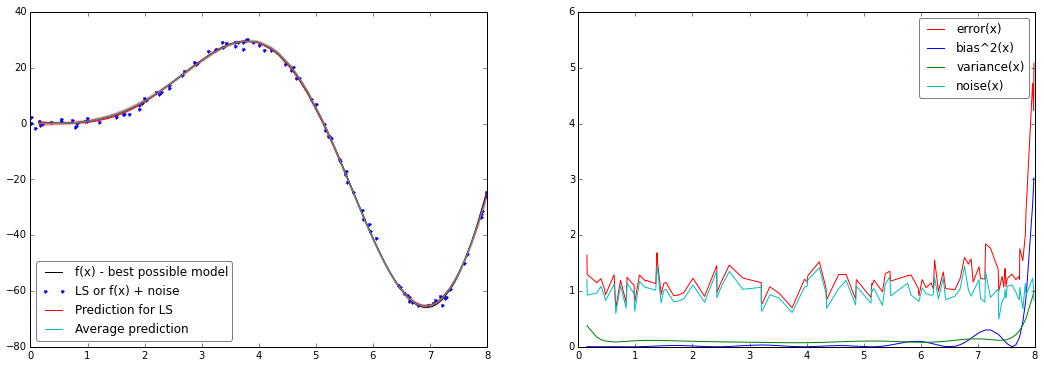

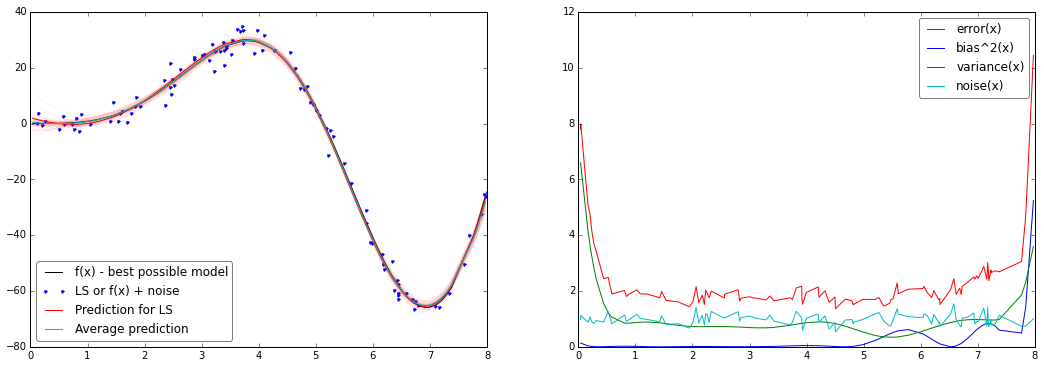

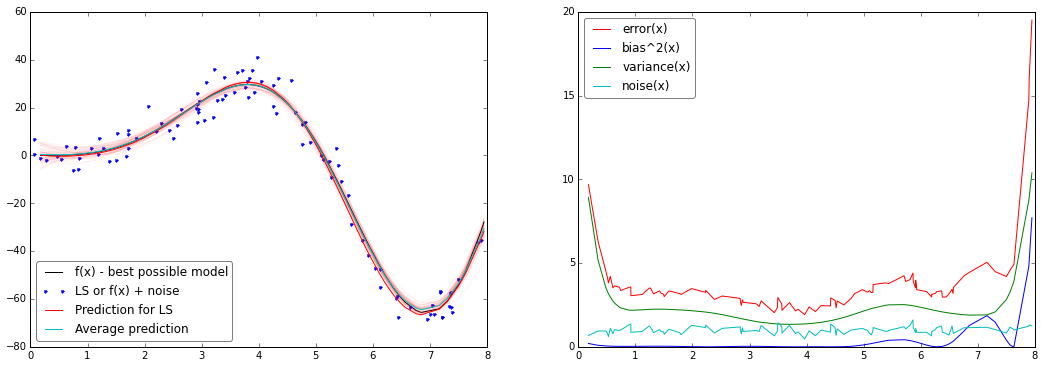

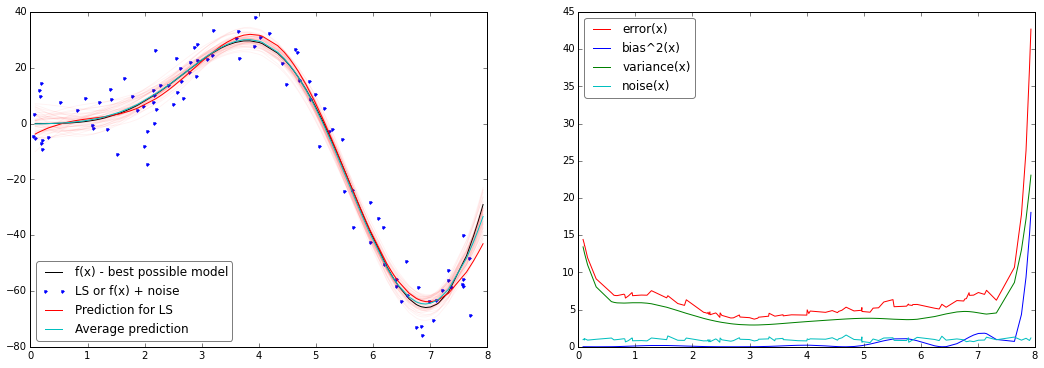

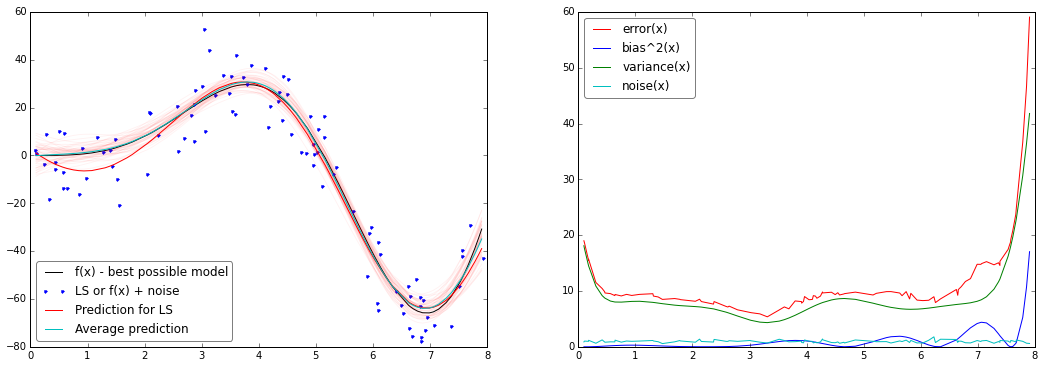

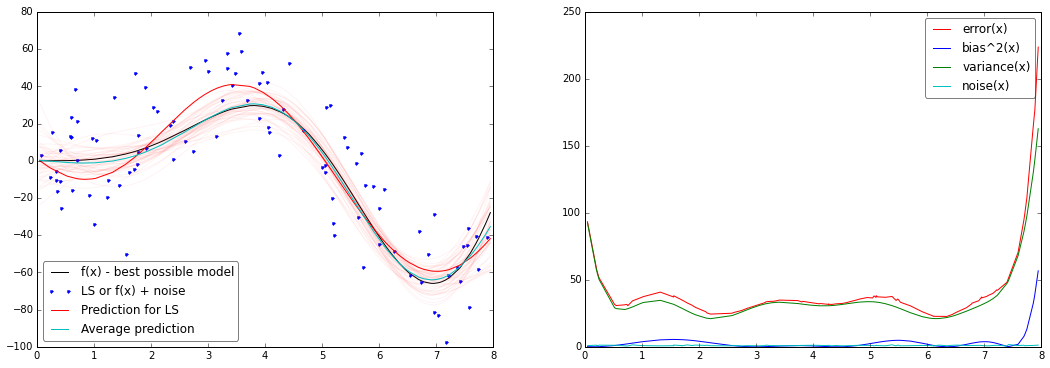

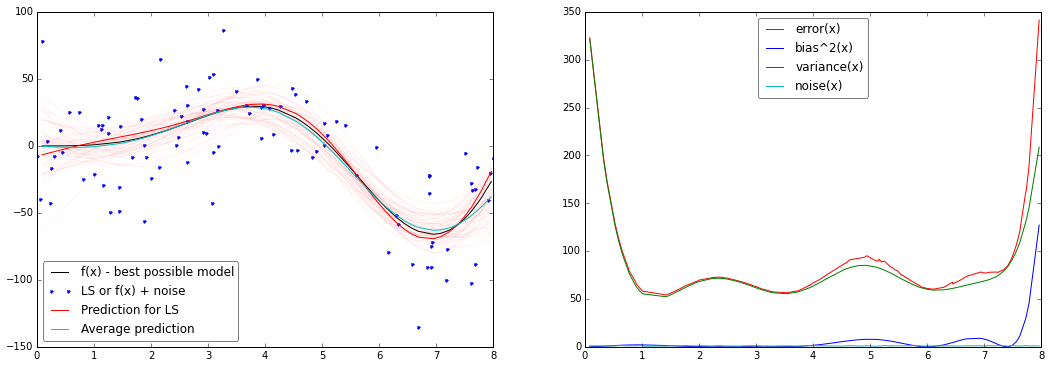

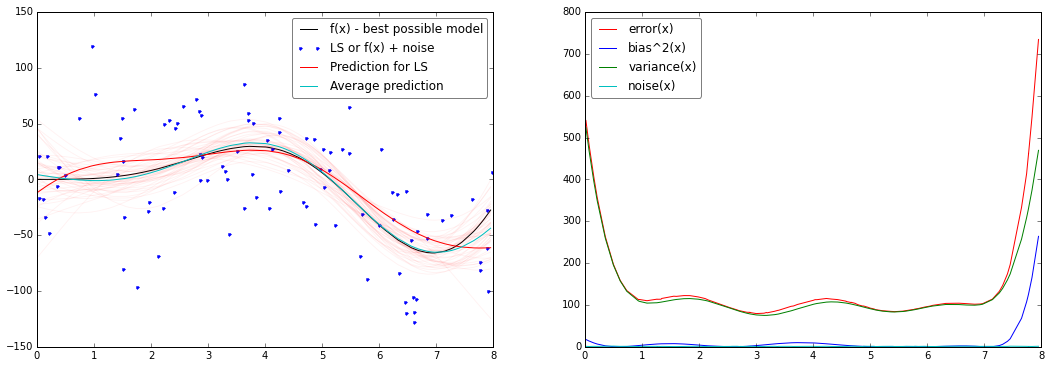

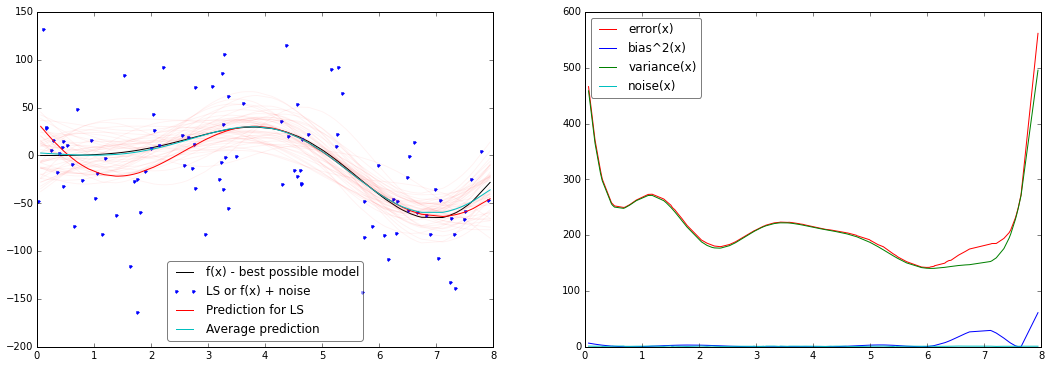

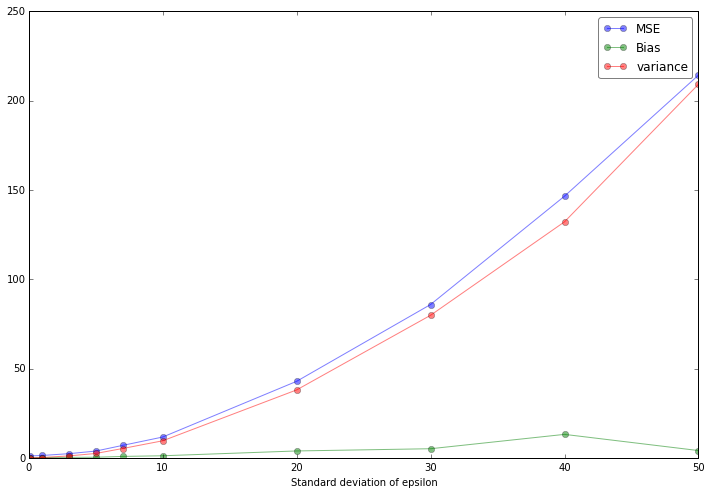

In [87]:
regr = svm.SVR(kernel='rbf', C=1e3, gamma=0.1)    
    
std_list = [0.1,1,3,5,7,10,20,30,40,50]
err = np.zeros((len(std_list)))
bi = np.zeros((len(std_list)))
va = np.zeros((len(std_list)))

for i, stddev in enumerate(std_list):
    if i == 0:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, stddev=stddev, save='plot_13')
    elif i == len(std_list)-1:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, stddev=stddev, save='plot_14')
    else:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, stddev=stddev)
    
plt.figure(figsize=(12,8))
plt.plot(std_list, err, 'o-', label='MSE', alpha=0.5)
plt.plot(std_list, bi, 'o-', label='Bias', alpha=0.5)
plt.plot(std_list, va, 'o-', label='variance', alpha=0.5)
plt.legend(loc='best', fancybox=True, framealpha=0.5)
# plt.yscale('log')
plt.xlabel('Standard deviation of epsilon')
plt.savefig('plot_15.pdf')
plt.show()

#### Model complexity

Finally we explore the MSE, the bias and variance as a function of the model complexity. For the Lasso we tried varying alpha which is the constant that multiplies the penalty term. Five values were used [0.001, 0.01, 0.1, 1, 10]. In [plot_16.pdf] and [plot_17.pdf] we show the extreme cases. The trend can be seen in [plot_18.pdf]. The model doesn't get better in terms of MSE. All the quatities remain stable.

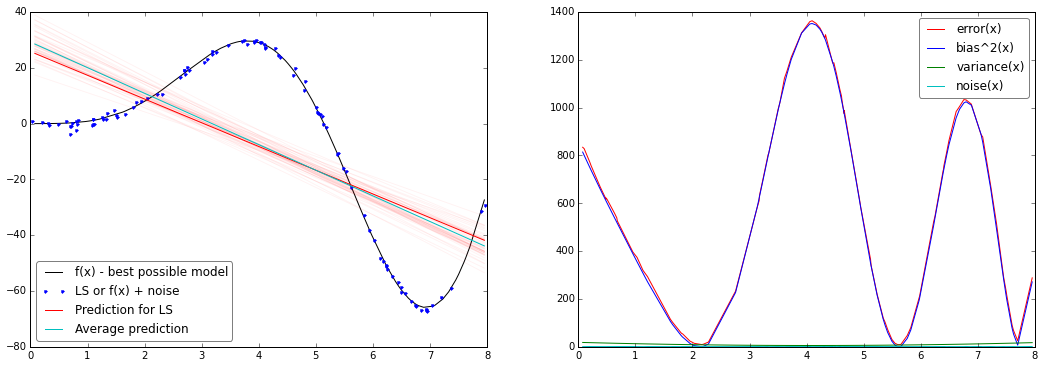

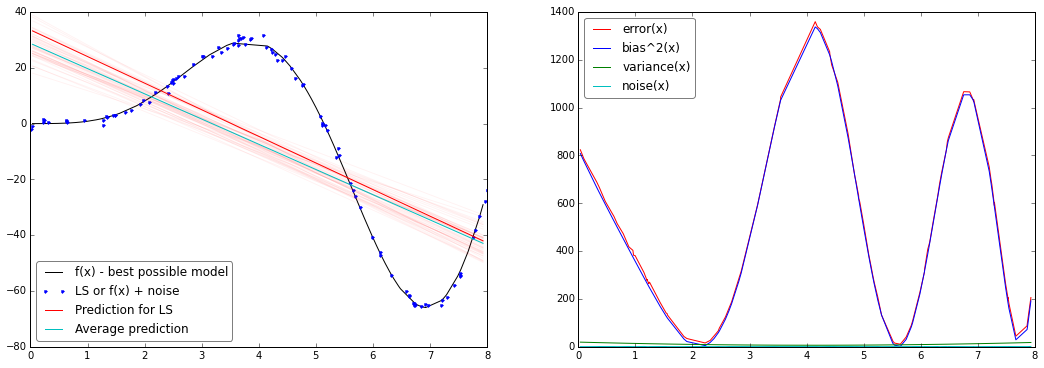

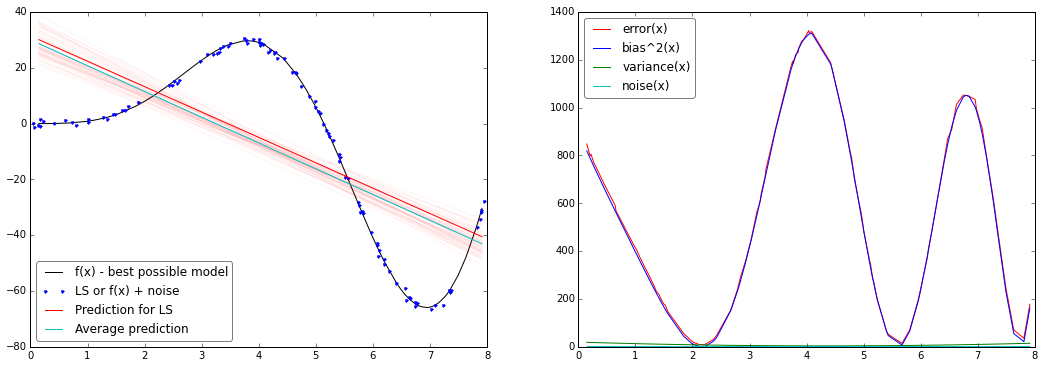

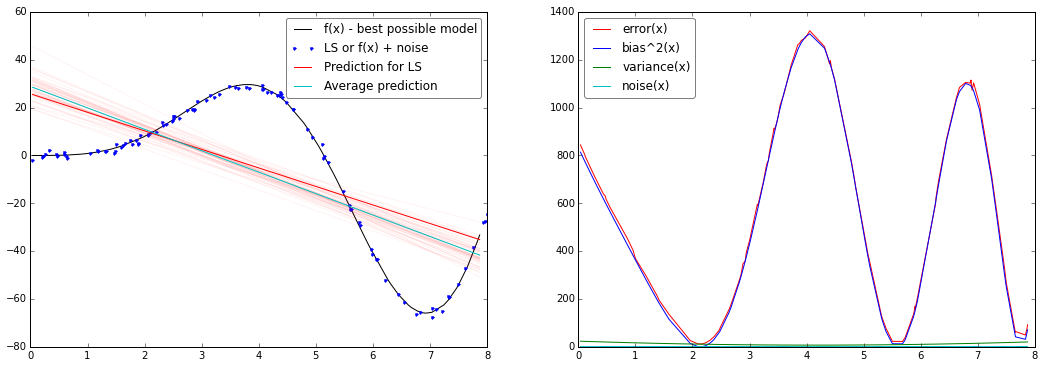

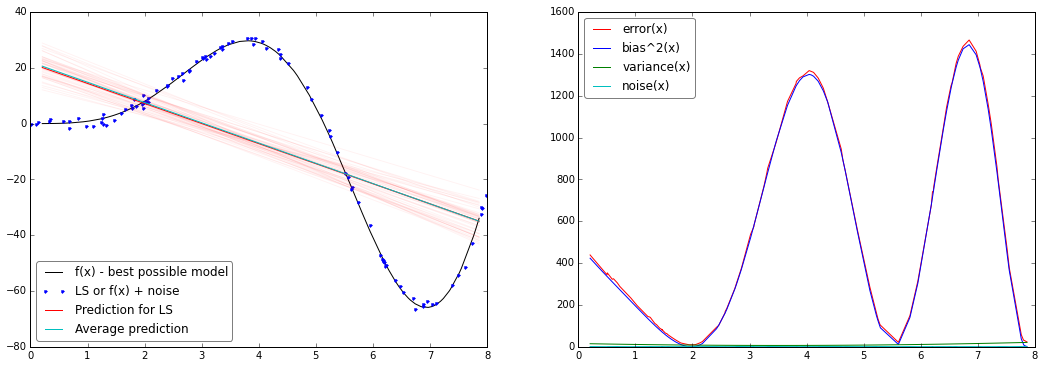

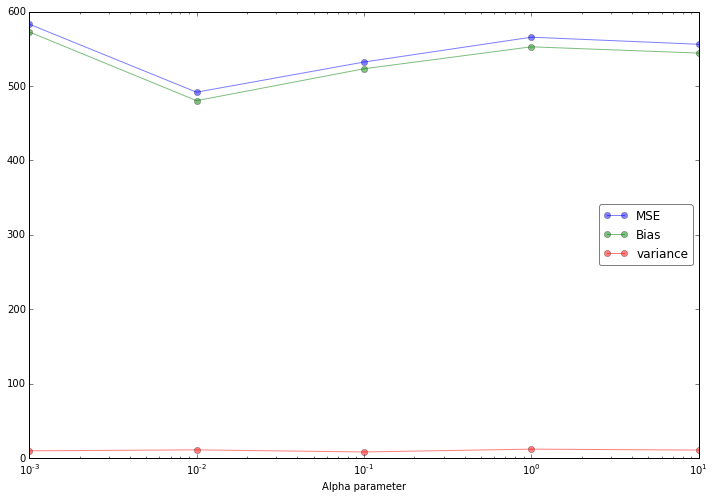

In [99]:
alpha_list = np.logspace(-3, 1, 5)
err = np.zeros((len(alpha_list)))
bi = np.zeros((len(alpha_list)))
va = np.zeros((len(alpha_list)))

for i, alpha in enumerate(alpha_list):
    regr = linear_model.Lasso(alpha=alpha, max_iter=1000)   
    if i == 0:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, save='plot_16')
    elif i == len(alpha_list)-1:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, save='plot_17')
    else:
        err[i], bi[i], va[i], _ = plot_bias_var(regr)
    
plt.figure(figsize=(12,8))
plt.plot(alpha_list, err, 'o-', label='MSE', alpha=0.5)
plt.plot(alpha_list, bi, 'o-', label='Bias', alpha=0.5)
plt.plot(alpha_list, va, 'o-', label='variance', alpha=0.5)
plt.legend(loc='best', fancybox=True, framealpha=0.5)
plt.xlabel('Alpha parameter')
plt.xscale('log')
plt.savefig('plot_18.pdf')
plt.show()


For the SVR we tried varying Gamma which is the coefficient for the gaussian kernel. Five values were used [0.001, 0.01, 0.1, 1, 10]. In [plot_19.pdf] and [plot_20.pdf] we show the extreme cases. With the lowest value of gamma the fits looks like a polynomial. All the three quantities are worse. The opposite case shows lower values of MSE, bias and variance, but the best is the intermidiate case with gamma=0.1 as seen in [plot_22.pdf]. The trend can be seen in [plot_21.pdf]. The model reachs the best state with gamma=0.1 with lowest bias and variance. The SVR has other hyperparameters that affect it's performance, so it can be adapted to many problems. Changing the kernel, from 'rbf' (radial basis function) to polynomial or linear gives much worse results. Other hyperparameter is C which is the penalty parameter of the error term. The best performance we found was with the 'rbf' kernel, C=1000, and gamma=0.1. In [plot_21.pdf] we can see how the higher values for gamma start to overfit the data (pink curves).

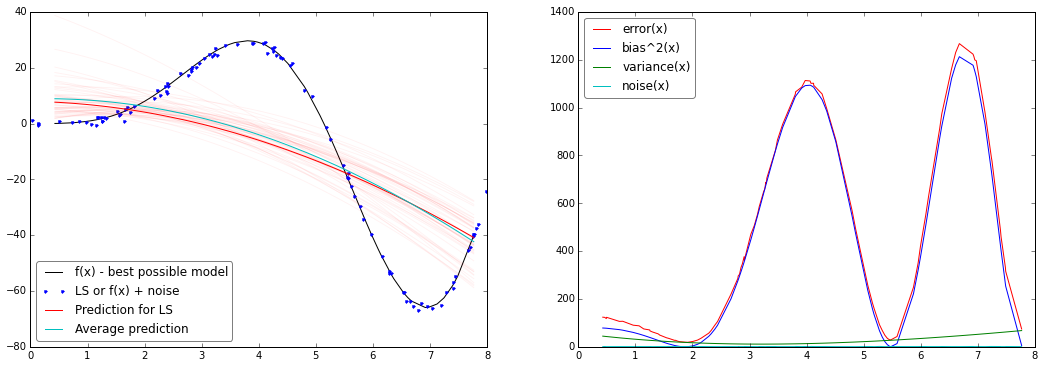

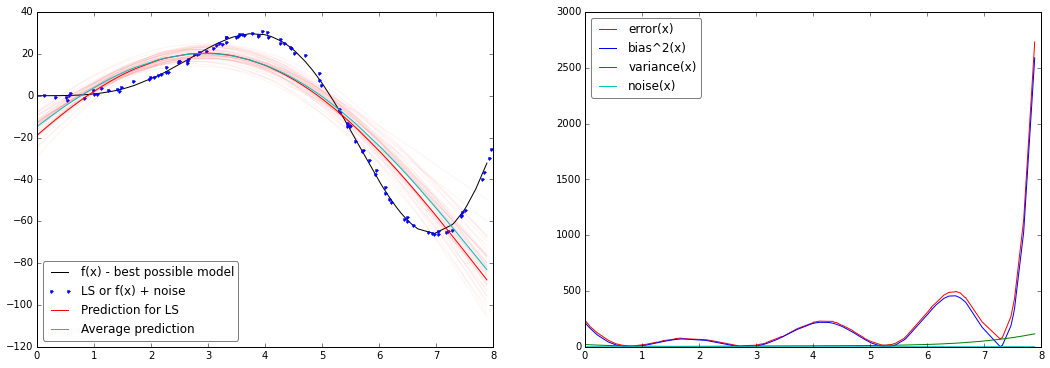

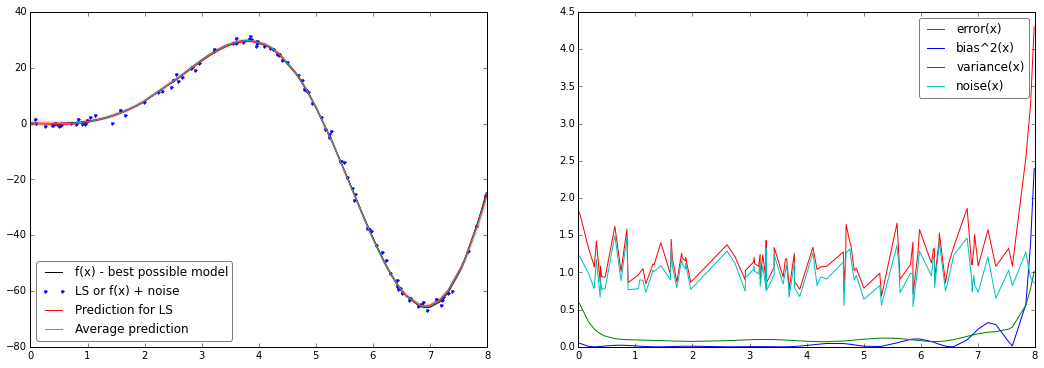

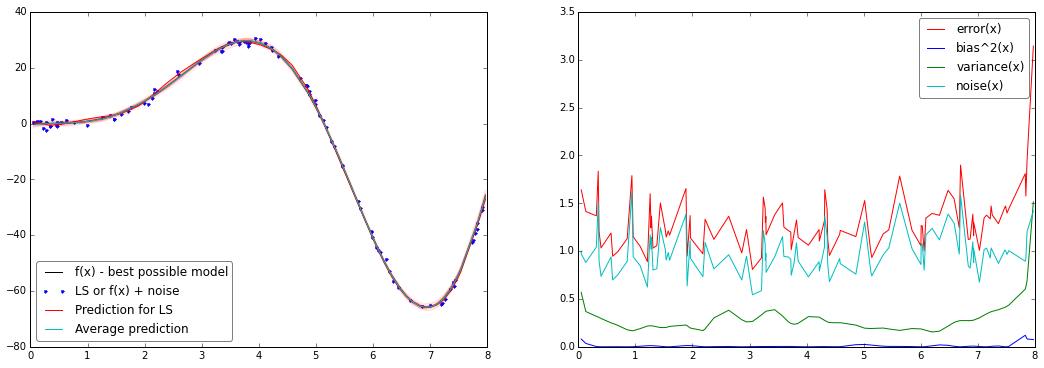

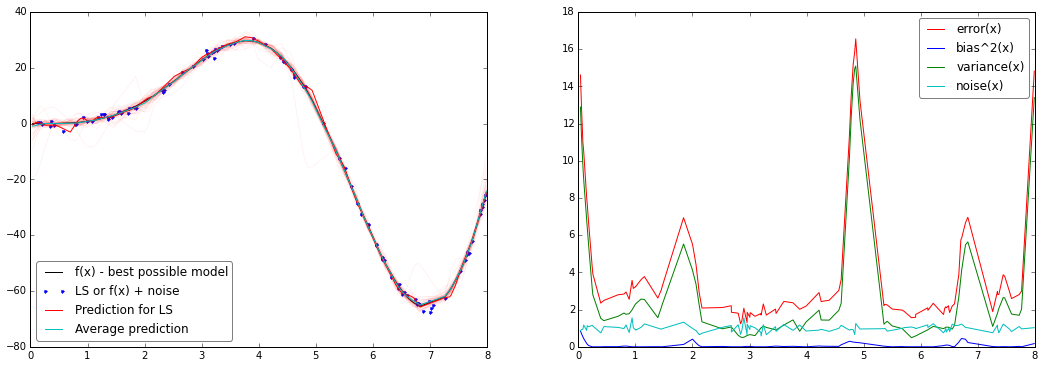

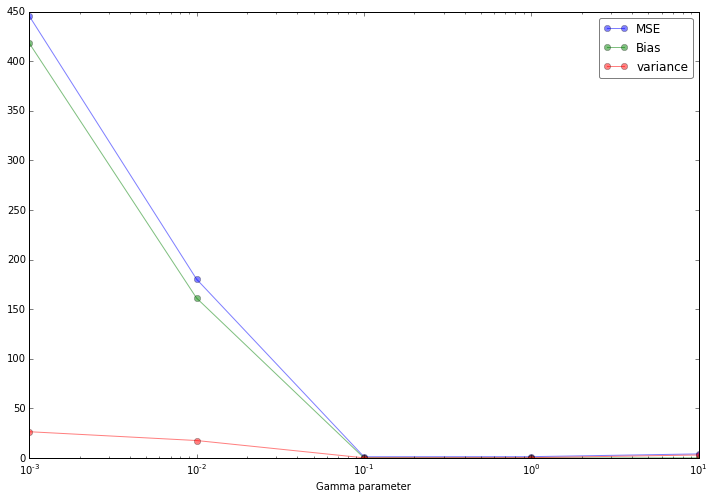

In [113]:
gamma_list = np.logspace(-3, 1, 5)
err = np.zeros((len(gamma_list)))
bi = np.zeros((len(gamma_list)))
va = np.zeros((len(gamma_list)))

for i, gamma in enumerate(gamma_list):
    regr = regr = svm.SVR(kernel='rbf', C=1e3, gamma=gamma)    
    if i == 0:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, save='plot_19')
    elif i == len(gamma_list)-1:
        err[i], bi[i], va[i], _ = plot_bias_var(regr, save='plot_20')
    else:
        err[i], bi[i], va[i], _ = plot_bias_var(regr)
    
plt.figure(figsize=(12,8))
plt.plot(gamma_list, err, 'o-', label='MSE', alpha=0.5)
plt.plot(gamma_list, bi, 'o-', label='Bias', alpha=0.5)
plt.plot(gamma_list, va, 'o-', label='variance', alpha=0.5)
plt.legend(loc='best', fancybox=True, framealpha=0.5)
plt.xlabel('Gamma parameter')
plt.xscale('log')
plt.savefig('plot_21.pdf')
plt.show()
